In [2]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [3]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [3]:
%%time
x = 0
probs_r= []
probs_g= []
probs_b= []
fname=[]
dir=[]

#for directory_path in glob.glob('C:\\Users\\akhil\\Desktop\\IIT_Madras\\image_data_juk\\white_selected\\100good_mixed\\*.jpg'):
for directory_path in glob.glob('BLUR_DATASET/Blur_sub_case/dark_glare/*.jpg'):
    image = cv2.imread(directory_path)
    img1 = cv2.resize(image, (255, 255))
    img_n1 = np.array(img1).copy()

    faces = face_cascade.detectMultiScale(img1, 1.3, 4)
    if len(faces) != 0:

        img_n1[faces[0][0] - int(faces[0][3]*0.2):faces[0][0]+faces[0][3],faces[0][1] - int(faces[0][2]*0.2) :faces[0][1]+faces[0][2] + int(faces[0][2]*0.2),:]=0
        img_n1[faces[0][0]+faces[0][3]:,:]=0


        idx=np.argwhere(img_n1!=0)
        binss=np.arange(0,265,20)
        r_hist2=np.histogram(img_n1[idx[:,0]],bins=binss)
        g_hist2=np.histogram(img_n1[idx[:,1]],bins=binss)
        b_hist2=np.histogram(img_n1[idx[:,2]],bins=binss)


        end_fil_r2=len(r_hist2[1])-len(r_hist2[0])
        end_fil_g2=len(g_hist2[1])-len(g_hist2[0])
        end_fil_b2=len(b_hist2[1])-len(b_hist2[0])

        r_hist2=np.append(np.array(r_hist2[0]),np.zeros(end_fil_r2))
        g_hist2=np.append(np.array(g_hist2[0]),np.zeros(end_fil_g2))
        b_hist2=np.append(np.array(b_hist2[0]),np.zeros(end_fil_b2))

        r_pdf2=r_hist2/np.sum(r_hist2)
        g_pdf2=g_hist2/np.sum(g_hist2)
        b_pdf2=b_hist2/np.sum(b_hist2)

        probs_r.append(r_pdf2)
        probs_g.append(g_pdf2)
        probs_b.append(b_pdf2)
        fname.append(directory_path)
        print(x)
        x = x + 1
        
probs = np.array(probs_r)
probs = np.array(probs_g)
probs = np.array(probs_b)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
CPU times: user 45.5 s, sys: 617 ms, total: 46.1 s
Wall time: 46.2 s


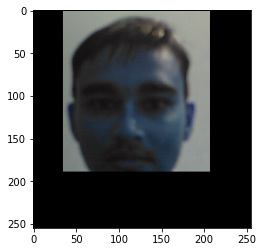

In [4]:

x = 0

fname=[]
dir=[]


image = cv2.imread("11.jpg")
img1 = cv2.resize(image, (255, 255))
t = np.array(img1).copy()
img_n1 = np.array(img1).copy()

faces = face_cascade.detectMultiScale(img1, 1.3, 4)


#img_n1[faces[0][0] - int(faces[0][2]*0.2):faces[0][0]+faces[0][2],faces[0][1] - int(faces[0][2]*0.1) :faces[0][1]+faces[0][2] + int(faces[0][1]*0.1),:]=0
img_n1[faces[0][0] - int(faces[0][2]*0.2):faces[0][0]+faces[0][2],faces[0][1] - int(faces[0][2]*0.1) :faces[0][1]+ faces[0][2],:]=0


a=t-img_n1

plt.imshow(a)


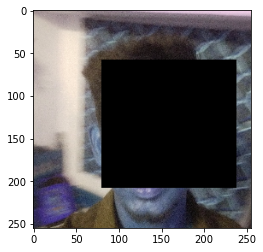

In [6]:

x = 0

fname=[]
dir=[]


image = cv2.imread("7.jpg")
img1 = cv2.resize(image, (255, 255))
t = np.array(img1).copy()
img_n1 = np.array(img1).copy()

faces = face_cascade.detectMultiScale(img1, 1.3, 4)


img_n1[faces[0][0]:faces[0][0]+faces[0][2],faces[0][1]:faces[0][1]+faces[0][2] + int(faces[0][1]*0.1),:]=0

plt.imshow(img_n1)


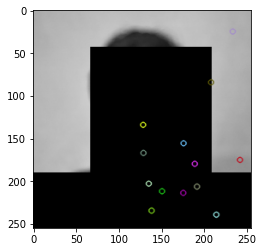

In [5]:

x = 0

fname=[]
dir=[]


image = cv2.imread("2.jpg")
img1 = cv2.resize(image, (255, 255))
img_n1 = np.array(img1).copy()

faces = face_cascade.detectMultiScale(img1, 1.3, 4)


img_n1[faces[0][0] - int(faces[0][2]*0.2):faces[0][0]+faces[0][2],faces[0][1] - int(faces[0][2]*0.1) :faces[0][1]+faces[0][2] + int(faces[0][1]*0.1),:]=0
img_n1[faces[0][0]+faces[0][3]:,:]=0

plt.imshow(img_n1)

gray_scale = cv2.cvtColor(img_n1, cv2.COLOR_BGR2GRAY)

#initialize SIFT object
sift = cv2.SIFT_create()

#detect keypoints
keypoints, _= sift.detectAndCompute(image, None)

#draw keypoints
sift_image = cv2.drawKeypoints(gray_scale, keypoints, None)

plt.imshow(sift_image)



In [7]:
len(probs)/14

1.7857142857142858

In [8]:
def kl_divergence(a,b):
    kld_vec1 = []
    kld_vec2 = []
    kld_mean = []
    zipped1 = list(zip(a, b))
    l= 1  
    for x in zipped1:
        kld = 0
        c, d = x
        zipped2 = list(zip(c, d))
        
        for y in zipped2:
            e, f = y
            print(l)
            l = l + 1
            
            print(kld)
            print('\n')
            kld = kld + np.multiply(e, (np.log(e+1e-5) - np.log(f+1e-5)))
                
                
        kld_vec1.append(round(kld,3))
                
    zipped3 = list(zip(b, a))
    l= 1  
    for x in zipped3:
        kld = 0
        c, d = x
        zipped4 = list(zip(c, d))
        
        for y in zipped4:
            e, f = y
            print(l)
            l = l + 1
            
            print(kld)
            print('\n')
            kld = kld + np.multiply(e, (np.log(e+1e-5) - np.log(f+1e-5)))
                
                
        kld_vec2.append(round(kld,3))
                
    for i in [0,1,2]:
        kld_mean.append(round((kld_vec1[i]+kld_vec2[i])/2,3))
    
    return kld_mean, kld_vec1, kld_vec2
                
        

In [9]:
def kl_divergence_1(a,b):
    sums=0
    for i in range(len(a)):
        ii=a[i]
        jj=b[i]
        sums+=np.multiply(ii,np.log(ii+1e-5)-np.log(jj+1e-5))
    return sums

def kl_divergence_1_mean(a,b):
    return  kl_divergence_1(a,b)/2+ kl_divergence_1(b,a)/2

In [12]:
kl_divergence_1(probs[13],probs[6])

10.786410647194739

In [13]:
db = DBSCAN(eps=0.15, min_samples=10, metric=kl_divergence_1_mean).fit(probs)

In [14]:
db.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

In [15]:
len(np.argwhere(db.labels_ == -1))

25

NameError: name 'labels' is not defined